In [21]:
%matplotlib inline 

import datetime
import os

import seaborn as sns
import pandas as pd

from gscripts.general import dataviz
from gscripts.encode import encode_helpers

img_dir = "/home/gpratt/Dropbox/encode_integration/qc_work/"


In [2]:
import matplotlib as mpl
legend = None

OUTSIDE_LEGEND_SAVEFIG_KWS = dict(bbox_extra_artists=(legend,),
                                  bbox_inches='tight')
from matplotlib import rc

mpl.rcParams['svg.fonttype'] = 'none'

rc('text', usetex=False) 
rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})

In [28]:
sns.set_style("ticks")

In [10]:
#Get all counts, but count only things that we plan on submitting
merged_data = encode_helpers.get_merged_data()
#Filter out anything sequenced after 16/7/18
merged_data[merged_data['Submitted Date'] < datetime.date(2016, 7, 18)]
#Filter out anything not_qced
merged_data = merged_data[merged_data.is_qced]

In [15]:
merged_data['group'] = 1
merged_data['group_y'] = 1

In [30]:
sns.countplot?

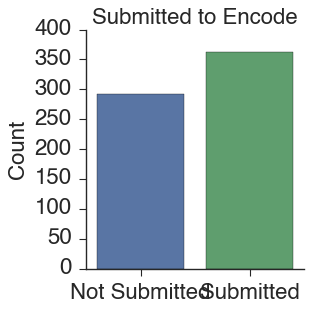

In [29]:
num_rows = 1
num_cols = 1
with dataviz.Figure(os.path.join(img_dir, "passed_and_failing.svg"), figsize=(4* num_cols, 4*num_rows)) as fig:
    ax = fig.add_subplot(1,1,1)
    sns.countplot(x="submitted", data=merged_data, ax=ax)
    ax.set_ylabel("Count", fontsize=20)
    ax.set_xlabel("")
    ax.set_title("Submitted to Encode", fontsize=20)
    ax.set_xticklabels(['Not Submitted', 'Submitted'])
    
    [tick.set_fontsize(20) for tick in ax.get_xticklabels()]
    [tick.set_fontsize(20) for tick in ax.get_yticklabels()]
    
    sns.despine(ax=ax)